In [11]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [79]:
mat = np.zeros((12,12))
for i in range(12):
    mat[i][i] = .66
for i in range(12):
    for j in range(12):
        if i == j: continue
        mat[i][j] = np.random.choice([1,-1])*mat[i][i]*np.exp(-.75*np.abs(j-i))

In [80]:
cols = ["lo_deep_Ask", "co_deep_Ask", "lo_top_Ask","co_top_Ask", "mo_Ask", "lo_inspread_Ask" ,
            "lo_inspread_Bid" , "mo_Bid", "co_top_Bid", "lo_top_Bid", "co_deep_Bid","lo_deep_Bid" ]

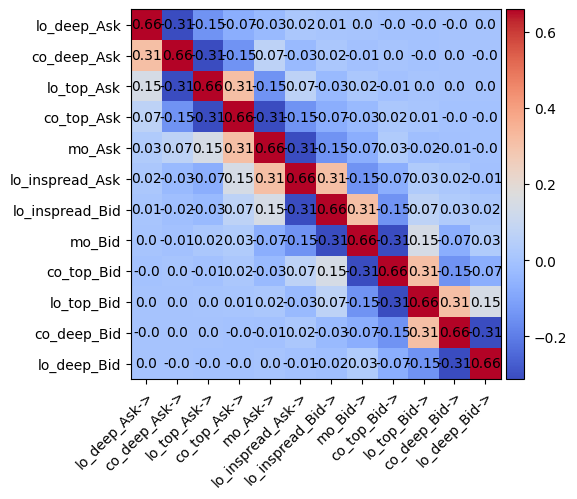

In [81]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax.imshow(mat.transpose(), cmap='coolwarm')
fig.colorbar(im, cax=cax, orientation='vertical')
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(cols)), labels=[c +"->" for c in cols])
ax.set_yticks(np.arange(len(cols)), labels=cols)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cols)):
    for j in range(len(cols)):
        text = ax.text(i,j, np.round(mat[i][j], decimals=2),
                               ha="center", va="center")
# fig.savefig("heatmap.png")
plt.show()


In [84]:
mat[0][1]

0.3117619248090697

In [83]:
np.max(np.linalg.eig(mat)[0])

(1.056786318306775+0j)

In [68]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/AAPL.OQ_ParamsInferredWCutoff_2019-01-02_2019-03-31_CLSLogLin_10", "rb") as f:
    params = pickle.load(f)
params

{'lo_deep_Ask': 0.07743576834429527,
 'lo_deep_Ask->lo_deep_Ask': (1.0,
  array([1.59157285e+03, 1.70000000e+00, 4.44099698e+03])),
 'co_deep_Ask->lo_deep_Ask': (1.0,
  array([6.35047102e+01, 1.56718750e+00, 1.66494514e+04])),
 'lo_top_Ask->lo_deep_Ask': (-1.0,
  array([1.48108781e+02, 1.70000000e+00, 2.25955491e+03])),
 'co_top_Ask->lo_deep_Ask': (1.0,
  array([9.83300532e+02, 1.55888657e+00, 2.62538374e+04])),
 'lo_inspread_Ask->lo_deep_Ask': (-1.0,
  array([1.67828708e+02, 1.70000000e+00, 1.81357539e+03])),
 'lo_inspread_Bid->lo_deep_Ask': (-1.0,
  array([1.67482825e+02, 1.70000000e+00, 1.96000572e+03])),
 'co_top_Bid->lo_deep_Ask': (1.0,
  array([8.37680892e+01, 1.27500000e+00, 5.76372027e+04])),
 'lo_top_Bid->lo_deep_Ask': (-1.0,
  array([1.26923038e+02, 1.70000000e+00, 2.41244385e+03])),
 'co_deep_Bid->lo_deep_Ask': (1.0,
  array([5.84764950e+02, 1.70000000e+00, 1.09221824e+04])),
 'co_deep_Ask': 0.09825699807644155,
 'co_deep_Ask->co_deep_Ask': (1.0,
  array([1.90304408e+03, 1.7

In [99]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/AAPL.OQ_Params_2019-01-02_2019-03-29_dictTOD", "rb") as f:
    tod = pickle.load(f)

In [103]:
paramsFake = {}
for i in range(12):
    paramsFake[cols[i]] = 0.1*np.random.choice([0.3,0.4,0.5,0.6,0.7])
    for j in range(12):
        maxTOD = np.max(list(tod[cols[j]].values()))
        beta = np.random.choice([1.5,1.6,1.7,1.8,1.9])
        gamma = (1+np.random.rand())*5e3
        alpha = np.abs(mat[i][j])*gamma*(beta-1)/maxTOD
        paramsFake[cols[i]+"->"+cols[j]] = (np.sign(mat[i][j]), np.np.array([alpha, beta, gamma]))

In [104]:
foparamsFake

{'lo_deep_Ask': 0.04000000000000001,
 'lo_deep_Ask->lo_deep_Ask': (1.0,
  array([3.19910774e+03, 1.80000000e+00, 9.04372032e+03])),
 'lo_deep_Ask->co_deep_Ask': (1.0,
  array([8.52241726e+02, 1.70000000e+00, 5.46589175e+03])),
 'lo_deep_Ask->lo_top_Ask': (1.0,
  array([2.77813136e+02, 1.50000000e+00, 6.42030761e+03])),
 'lo_deep_Ask->co_top_Ask': (1.0,
  array([1.38377915e+02, 1.50000000e+00, 5.99051295e+03])),
 'lo_deep_Ask->mo_Ask': (1.0,
  array([1.09868907e+02, 1.70000000e+00, 9.14604132e+03])),
 'lo_deep_Ask->lo_inspread_Ask': (1.0,
  array([2.24139882e+01, 1.50000000e+00, 6.90350330e+03])),
 'lo_deep_Ask->lo_inspread_Bid': (1.0,
  array([1.67480628e+01, 1.60000000e+00, 9.22491184e+03])),
 'lo_deep_Ask->mo_Bid': (1.0,
  array([5.32535091e+00, 1.50000000e+00, 6.09663909e+03])),
 'lo_deep_Ask->co_top_Bid': (-1.0,
  array([4.01603844e+00, 1.60000000e+00, 6.74731175e+03])),
 'lo_deep_Ask->lo_top_Bid': (1.0,
  array([2.48960806e+00, 1.60000000e+00, 9.88838291e+03])),
 'lo_deep_Ask->co_

In [105]:
mat = np.zeros((12,12))
for i in range(len(cols)):
    for j in range(len(cols)):
        kernelParams = paramsFake.get(cols[j]+"->"+cols[i], None)
        if kernelParams is None: continue
        mat[i][j] = kernelParams[0]*kernelParams[1][0]/((-1 + kernelParams[1][1])*kernelParams[1][2])
# mat[:,5] = mat[:,5]*(0.0101)**0.7479
# mat[:,6] = mat[:,6]*(0.0169)**0.7479

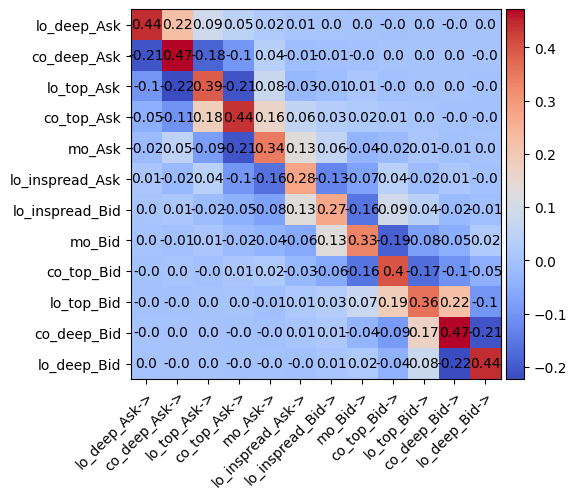

In [106]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax.imshow(mat.transpose(), cmap='coolwarm')
fig.colorbar(im, cax=cax, orientation='vertical')
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(cols)), labels=[c +"->" for c in cols])
ax.set_yticks(np.arange(len(cols)), labels=cols)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cols)):
    for j in range(len(cols)):
        text = ax.text(i,j, np.round(mat[i][j], decimals=2),
                               ha="center", va="center")
# fig.savefig("heatmap.png")
plt.show()


In [107]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/fake_ParamsInferredWCutoff_2019-01-02_2019-03-31_CLSLogLin_10", "wb") as f:
    pickle.dump(paramsFake, f)

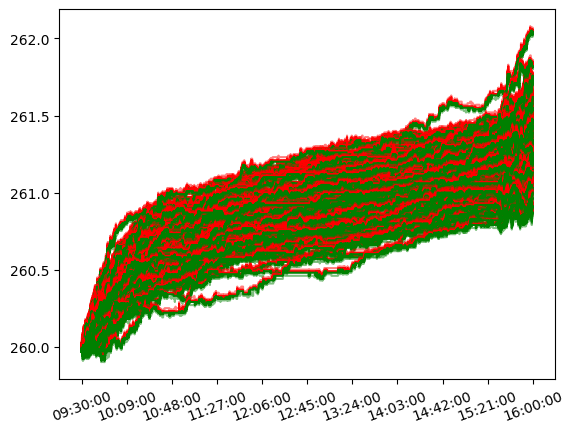

In [108]:
import time
import os
dataPath = "/SAN/fca/Konark_PhD_Experiments/simulated/fakeData"
ric = "fake" #"AAPL.OQ"
suffix = "CLSLogLin_10" #"CLSLogLin_10"
paths = [dataPath + "/" + i for i in os.listdir(dataPath) if (ric in i)&(suffix in i)&(~("tmp" in i))]
for p in paths:
    resPath = p
    with open(resPath, 'rb') as f:
        results = pickle.load(f)
        
    #     res = []
    #     while True:
    #                     try:
    #                         res.append(pickle.load(f))
    #                     except EOFError:
    #                         break
    # results = ([i[0] for i in res],[i[1] for i in res])
    
    ask_t = []
    bid_t = []
    ask_d = []
    bid_d= []
    spread = []
    for r in results[1]:
        ask_t.append(r['Ask_touch'][0])
        bid_t.append(r['Bid_touch'][0])
        ask_d.append(r['Ask_deep'][0])
        bid_d.append(r['Bid_deep'][0])
        spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
    t = np.append([0], np.np.array(results[0][1:])[:,1])
    t = t.astype(float) + 9.5*3600
    plt.plot(t, ask_t, color = "r")
    plt.plot(t, ask_d, color="r", alpha = 0.5)
    plt.plot(t, bid_t, color="g")
    plt.plot(t, bid_d, color="g", alpha = 0.5)
count = int((max(t) - min(t))/10)
plt.xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

In [1]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/fake_ParamsInferredWCutoff_2019-01-02_2019-03-31_CLSLogLin_10", "wb") as f:
    paramsFake = pickle.load(f)

NameError: name 'pickle' is not defined

In [112]:
results[0][1:]

[['mo_Ask', 1.055030192276883, 0.07385211345938181],
 ['mo_Ask', 1.0552294327187688, 1.394683093200566e-05],
 ['mo_Ask', 1.0552531230366085, 1.6583222487764892e-06],
 ['lo_inspread_Ask', 1.0552940575490157, 0.09262782542655247],
 ['lo_inspread_Ask', 1.0553904581954732, 5.038573386179946e-06],
 ['lo_inspread_Ask', 1.0555907031765146, 4.602039006696596e-06],
 ['lo_top_Ask', 3.6634593403222033, 0.1831729670161102],
 ['co_top_Ask', 7.49671160007191, 0.2998684640028765],
 ['co_top_Bid', 7.496739467218692, 0.22490218401656076],
 ['co_top_Ask', 7.496839719486008, 5.124776563931733e-06],
 ['co_top_Bid', 7.497127611400418, 1.1644325451785065e-05],
 ['co_top_Bid', 7.559674261246106, 0.0018763994953706307],
 ['lo_inspread_Bid', 7.596553822793799, 0.29097389297141346],
 ['co_deep_Bid', 8.689960100967753, 0.43449800504838765],
 ['lo_top_Bid', 8.691145227163922, 0.26073435681491763],
 ['co_top_Bid', 8.691338212100952, 0.03394991852564538],
 ['mo_Bid', 9.158650515980192, 0.27475951547940575],
 ['mo_B

In [115]:
len(results[1])

28321

In [7]:
import time
import os
import pickle
import pandas as pd
dataPath = "/SAN/fca/Konark_PhD_Experiments/simulated/fakeData"
ric = "fake" #"AAPL.OQ"
suffix = "CLSLogLin_10" #"CLSLogLin_10"
paths = [dataPath + "/" + i for i in os.listdir(dataPath) if (ric in i)&(suffix in i)&(~("tmp" in i))]
for p in paths:
    resPath = p
    with open(resPath, 'rb') as f:
        results = pickle.load(f)
        
    #     res = []
    #     while True:
    #                     try:
    #                         res.append(pickle.load(f))
    #                     except EOFError:
    #                         break
    # results = ([i[0] for i in res],[i[1] for i in res])
    
    ask_t = []
    bid_t = []
    ask_d = []
    bid_d= []
    event = []
    time = []
    for r, j in zip(results[1][1:], results[0][1:]):
        ask_t.append(r['Ask_touch'][0])
        bid_t.append(r['Bid_touch'][0])
        ask_d.append(r['Ask_deep'][0])
        bid_d.append(r['Bid_deep'][0])
        event.append(j[0])
        time.append(j[1])
    df = pd.DataFrame({"Time" : time, "event" : event, "Ask Price 1" : ask_t, "Bid Price 1": bid_t, "Ask Price 2": ask_d, "Bid Price 2" : bid_d})
    df['BidDiff'] = df['Bid Price 1'].diff()
    df['AskDiff'] = df['Ask Price 1'].diff()
    df['BidDiff2']= df['Bid Price 2'].diff()
    df['AskDiff2']= df['Ask Price 2'].diff()
    id = (resPath.split("/")[-1]).split("_")[-1]
    df["Date"] = id
    df.to_csv(dataPath+"/fake_" + id +"_12D.csv")

In [4]:
len(time)

27180

In [9]:
cols = ["lo_deep_Ask", "co_deep_Ask", "lo_top_Ask","co_top_Ask", "mo_Ask", "lo_inspread_Ask" ,
            "lo_inspread_Bid" , "mo_Bid", "co_top_Bid", "lo_top_Bid", "co_deep_Bid","lo_deep_Bid" ]

In [17]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/fake_Params_2019-01-02_2019-03-29_dictTOD", "rb") as f:
    tod = pickle.load(f)
with open("/SAN/fca/Konark_PhD_Experiments/extracted/fake_ParamsInferredWCutoff_2019-01-02_2019-03-31_CLSLogLin_10", "rb") as f:
    params = pickle.load(f)
mat = np.zeros((12,12))
for i in range(12):
        for j in range(12):
            kernelParams = params.get(cols[i] + "->" + cols[j], None)
            if kernelParams is None: continue
            if np.isnan(kernelParams[1][2]): continue
            # print(cols[i] + "->" + cols[j])
            # print((kernelParams[0]*np.exp(kernelParams[1][0]) , kernelParams[1][1] , kernelParams[1][2]))
            todMult = 1
            mat[i][j]  = todMult*kernelParams[0]*kernelParams[1][0]/((-1 + kernelParams[1][1])*kernelParams[1][2]) # alpha/(beta -1)*gamma]

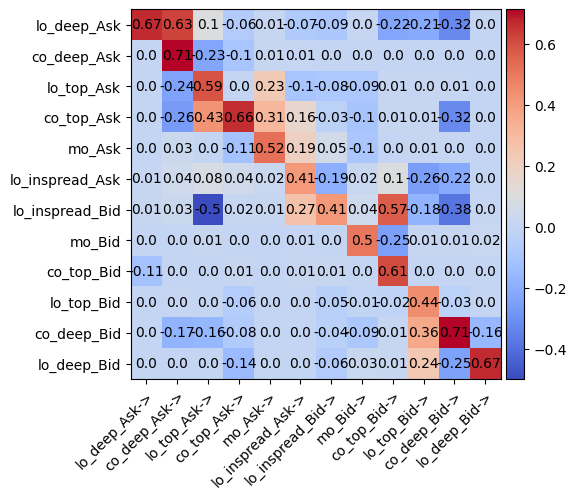

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax.imshow(mat, cmap='coolwarm')
fig.colorbar(im, cax=cax, orientation='vertical')
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(cols)), labels=[c +"->" for c in cols])
ax.set_yticks(np.arange(len(cols)), labels=cols)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cols)):
    for j in range(len(cols)):
        text = ax.text(i,j, np.round(mat[j][i], decimals=2),
                               ha="center", va="center")
# fig.savefig("heatmap.png")
plt.show()


In [2]:
import pickle
with open("/SAN/fca/Konark_PhD_Experiments/extracted/fake_ParamsInferredWCutoff_2019-01-02_2019-03-31_CLSLogLin_10", "rb") as f:
    params = pickle.load(f)

In [3]:
import numpy as np

In [4]:
realParams = {'lo_deep_Ask': 0.04000000000000001,
 'lo_deep_Ask->lo_deep_Ask': (1.0,
  np.array([3.19910774e+03, 1.80000000e+00, 9.04372032e+03])),
 'lo_deep_Ask->co_deep_Ask': (1.0,
  np.array([8.52241726e+02, 1.70000000e+00, 5.46589175e+03])),
 'lo_deep_Ask->lo_top_Ask': (1.0,
  np.array([2.77813136e+02, 1.50000000e+00, 6.42030761e+03])),
 'lo_deep_Ask->co_top_Ask': (1.0,
  np.array([1.38377915e+02, 1.50000000e+00, 5.99051295e+03])),
 'lo_deep_Ask->mo_Ask': (1.0,
  np.array([1.09868907e+02, 1.70000000e+00, 9.14604132e+03])),
 'lo_deep_Ask->lo_inspread_Ask': (1.0,
  np.array([2.24139882e+01, 1.50000000e+00, 6.90350330e+03])),
 'lo_deep_Ask->lo_inspread_Bid': (1.0,
  np.array([1.67480628e+01, 1.60000000e+00, 9.22491184e+03])),
 'lo_deep_Ask->mo_Bid': (1.0,
  np.array([5.32535091e+00, 1.50000000e+00, 6.09663909e+03])),
 'lo_deep_Ask->co_top_Bid': (-1.0,
  np.array([4.01603844e+00, 1.60000000e+00, 6.74731175e+03])),
 'lo_deep_Ask->lo_top_Bid': (1.0,
  np.array([2.48960806e+00, 1.60000000e+00, 9.88838291e+03])),
 'lo_deep_Ask->co_deep_Bid': (-1.0,
  np.array([1.54710575e+00, 1.60000000e+00, 9.92722225e+03])),
 'lo_deep_Ask->lo_deep_Bid': (1.0,
  np.array([4.99808006e-01, 1.60000000e+00, 7.21032431e+03])),
 'co_deep_Ask': 0.04000000000000001,
 'co_deep_Ask->lo_deep_Ask': (-1.0,
  np.array([1.46126170e+03, 1.80000000e+00, 8.74514711e+03])),
 'co_deep_Ask->co_deep_Ask': (1.0,
  np.array([2.31977253e+03, 1.60000000e+00, 8.19916380e+03])),
 'co_deep_Ask->lo_top_Ask': (-1.0,
  np.array([1.41427162e+03, 1.80000000e+00, 9.64928294e+03])),
 'co_deep_Ask->co_top_Ask': (-1.0,
  np.array([6.43580233e+02, 1.90000000e+00, 7.31150125e+03])),
 'co_deep_Ask->mo_Ask': (1.0,
  np.array([1.53534860e+02, 1.70000000e+00, 6.03732412e+03])),
 'co_deep_Ask->lo_inspread_Ask': (-1.0,
  np.array([8.67374853e+01, 1.90000000e+00, 7.01073994e+03])),
 'co_deep_Ask->lo_inspread_Bid': (-1.0,
  np.array([3.81295494e+01, 1.70000000e+00, 8.50338154e+03])),
 'co_deep_Ask->mo_Bid': (-1.0,
  np.array([1.91041820e+01, 1.70000000e+00, 7.37941279e+03])),
 'co_deep_Ask->co_top_Bid': (1.0,
  np.array([1.12687285e+01, 1.60000000e+00, 8.94307696e+03])),
 'co_deep_Ask->lo_top_Bid': (1.0,
  np.array([7.29794057e+00, 1.90000000e+00, 9.12814428e+03])),
 'co_deep_Ask->co_deep_Bid': (1.0,
  np.array([2.50021964e+00, 1.80000000e+00, 5.68363672e+03])),
 'co_deep_Ask->lo_deep_Bid': (-1.0,
  np.array([1.61752060e+00, 1.80000000e+00, 8.26688342e+03])),
 'lo_top_Ask': 0.05,
 'lo_top_Ask->lo_deep_Ask': (-1.0,
  np.array([3.16631109e+02, 1.60000000e+00, 5.34874997e+03])),
 'lo_top_Ask->co_deep_Ask': (-1.0,
  np.array([1.30531351e+03, 1.80000000e+00, 7.32522754e+03])),
 'lo_top_Ask->lo_top_Ask': (1.0,
  np.array([1.58990194e+03, 1.80000000e+00, 5.12403033e+03])),
 'lo_top_Ask->co_top_Ask': (-1.0,
  np.array([8.89173225e+02, 1.70000000e+00, 6.13498982e+03])),
 'lo_top_Ask->mo_Ask': (1.0,
  np.array([5.18534686e+02, 1.90000000e+00, 7.49117560e+03])),
 'lo_top_Ask->lo_inspread_Ask': (-1.0,
  np.array([1.54792181e+02, 1.80000000e+00, 6.64871492e+03])),
 'lo_top_Ask->lo_inspread_Bid': (-1.0,
  np.array([5.89968961e+01, 1.80000000e+00, 5.43808946e+03])),
 'lo_top_Ask->mo_Bid': (1.0,
  np.array([3.88155847e+01, 1.50000000e+00, 9.91531840e+03])),
 'lo_top_Ask->co_top_Bid': (-1.0,
  np.array([1.81838769e+01, 1.50000000e+00, 8.18010581e+03])),
 'lo_top_Ask->lo_top_Bid': (1.0,
  np.array([9.89535743e+00, 1.60000000e+00, 8.76968626e+03])),
 'lo_top_Ask->co_deep_Bid': (1.0,
  np.array([7.39152726e+00, 1.80000000e+00, 7.93709301e+03])),
 'lo_top_Ask->lo_deep_Bid': (-1.0,
  np.array([2.95040583e+00, 1.70000000e+00, 8.14038293e+03])),
 'co_top_Ask': 0.04000000000000001,
 'co_top_Ask->lo_deep_Ask': (-1.0,
  np.array([2.44342569e+02, 1.80000000e+00, 6.55360070e+03])),
 'co_top_Ask->co_deep_Ask': (-1.0,
  np.array([8.76866352e+02, 1.90000000e+00, 9.25993696e+03])),
 'co_top_Ask->lo_top_Ask': (1.0,
  np.array([1.07683207e+03, 1.80000000e+00, 7.34700267e+03])),
 'co_top_Ask->co_top_Ask': (1.0,
  np.array([2.91482122e+03, 1.80000000e+00, 8.31240288e+03])),
 'co_top_Ask->mo_Ask': (1.0,
  np.array([5.73988040e+02, 1.70000000e+00, 5.03614952e+03])),
 'co_top_Ask->lo_inspread_Ask': (1.0,
  np.array([3.61515795e+02, 1.80000000e+00, 7.33491537e+03])),
 'co_top_Ask->lo_inspread_Bid': (1.0,
  np.array([2.17419000e+02, 1.90000000e+00, 8.41475148e+03])),
 'co_top_Ask->mo_Bid': (1.0,
  np.array([9.67867832e+01, 1.60000000e+00, 9.73227744e+03])),
 'co_top_Ask->co_top_Bid': (1.0,
  np.array([3.81712607e+01, 1.50000000e+00, 8.11125549e+03])),
 'co_top_Ask->lo_top_Bid': (1.0,
  np.array([1.90204546e+01, 1.90000000e+00, 5.30837191e+03])),
 'co_top_Ask->co_deep_Bid': (-1.0,
  np.array([1.96702181e+01, 1.90000000e+00, 8.86876359e+03])),
 'co_top_Ask->lo_deep_Bid': (-1.0,
  np.array([9.29216112e+00, 1.90000000e+00, 9.41920998e+03])),
 'mo_Ask': 0.06999999999999999,
 'mo_Ask->lo_deep_Ask': (-1.0,
  np.array([1.12205131e+02, 1.80000000e+00, 6.37109995e+03])),
 'mo_Ask->co_deep_Ask': (1.0,
  np.array([3.96014435e+02, 1.80000000e+00, 9.95999283e+03])),
 'mo_Ask->lo_top_Ask': (-1.0,
  np.array([4.21102669e+02, 1.60000000e+00, 8.10979371e+03])),
 'mo_Ask->co_top_Ask': (-1.0,
  np.array([8.47569169e+02, 1.50000000e+00, 8.18711058e+03])),
 'mo_Ask->mo_Ask': (1.0,
  np.array([2.66698570e+03, 1.80000000e+00, 9.67171858e+03])),
 'mo_Ask->lo_inspread_Ask': (1.0,
  np.array([8.56030688e+02, 1.90000000e+00, 7.29262329e+03])),
 'mo_Ask->lo_inspread_Bid': (1.0,
  np.array([2.51523662e+02, 1.70000000e+00, 5.91216104e+03])),
 'mo_Ask->mo_Bid': (-1.0,
  np.array([1.95535852e+02, 1.80000000e+00, 6.96570736e+03])),
 'mo_Ask->co_top_Bid': (-1.0,
  np.array([1.50858857e+02, 1.80000000e+00, 9.46414852e+03])),
 'mo_Ask->lo_top_Bid': (1.0,
  np.array([3.93209457e+01, 1.60000000e+00, 7.77561595e+03])),
 'mo_Ask->co_deep_Bid': (-1.0,
  np.array([2.41876979e+01, 1.60000000e+00, 7.72714097e+03])),
 'mo_Ask->lo_deep_Bid': (1.0,
  np.array([7.99628556e+00, 1.50000000e+00, 6.89187967e+03])),
 'lo_inspread_Ask': 0.03,
 'lo_inspread_Ask->lo_deep_Ask': (1.0,
  np.array([4.92198679e+01, 1.60000000e+00, 7.88863285e+03])),
 'lo_inspread_Ask->co_deep_Ask': (-1.0,
  np.array([1.35387993e+02, 1.70000000e+00, 8.23836380e+03])),
 'lo_inspread_Ask->lo_top_Ask': (1.0,
  np.array([1.07543056e+02, 1.50000000e+00, 5.26146024e+03])),
 'lo_inspread_Ask->co_top_Ask': (-1.0,
  np.array([6.68212370e+02, 1.80000000e+00, 8.54025613e+03])),
 'lo_inspread_Ask->mo_Ask': (-1.0,
  np.array([5.00582945e+02, 1.50000000e+00, 6.14893437e+03])),
 'lo_inspread_Ask->lo_inspread_Ask': (1.0,
  np.array([2.04316550e+03, 1.80000000e+00, 9.24974275e+03])),
 'lo_inspread_Ask->lo_inspread_Bid': (-1.0,
  np.array([8.77818175e+02, 1.90000000e+00, 7.58065350e+03])),
 'lo_inspread_Ask->mo_Bid': (-1.0,
  np.array([4.16627662e+02, 1.70000000e+00, 8.01231498e+03])),
 'lo_inspread_Ask->co_top_Bid': (1.0,
  np.array([1.96347232e+02, 1.90000000e+00, 5.17204306e+03])),
 'lo_inspread_Ask->lo_top_Bid': (-1.0,
  np.array([1.04608303e+02, 1.80000000e+00, 7.32853906e+03])),
 'lo_inspread_Ask->co_deep_Bid': (1.0,
  np.array([3.23562182e+01, 1.50000000e+00, 5.85925556e+03])),
 'lo_inspread_Ask->lo_deep_Bid': (-1.0,
  np.array([2.12351962e+01, 1.70000000e+00, 6.17528168e+03])),
 'lo_inspread_Bid': 0.05,
 'lo_inspread_Bid->lo_deep_Ask': (1.0,
  np.array([2.85197047e+01, 1.70000000e+00, 8.29431254e+03])),
 'lo_inspread_Bid->co_deep_Ask': (1.0,
  np.array([4.02697921e+01, 1.60000000e+00, 6.05212452e+03])),
 'lo_inspread_Bid->lo_top_Ask': (-1.0,
  np.array([7.14265323e+01, 1.60000000e+00, 6.16485834e+03])),
 'lo_inspread_Bid->co_top_Ask': (-1.0,
  np.array([2.81037368e+02, 1.80000000e+00, 7.60398613e+03])),
 'lo_inspread_Bid->mo_Ask': (-1.0,
  np.array([5.94955589e+02, 1.90000000e+00, 8.59521438e+03])),
 'lo_inspread_Bid->lo_inspread_Ask': (1.0,
  np.array([6.10280929e+02, 1.50000000e+00, 9.35829540e+03])),
 'lo_inspread_Bid->lo_inspread_Bid': (1.0,
  np.array([1.20771690e+03, 1.60000000e+00, 7.38988396e+03])),
 'lo_inspread_Bid->mo_Bid': (-1.0,
  np.array([1.14486057e+03, 1.90000000e+00, 8.08904367e+03])),
 'lo_inspread_Bid->co_top_Bid': (1.0,
  np.array([4.83529598e+02, 1.80000000e+00, 6.76849440e+03])),
 'lo_inspread_Bid->lo_top_Bid': (1.0,
  np.array([1.80342571e+02, 1.50000000e+00, 9.54879626e+03])),
 'lo_inspread_Bid->co_deep_Bid': (-1.0,
  np.array([1.01483693e+02, 1.50000000e+00, 8.68080669e+03])),
 'lo_inspread_Bid->lo_deep_Bid': (-1.0,
  np.array([7.99745983e+01, 1.90000000e+00, 8.54451133e+03])),
 'mo_Bid': 0.03,
 'mo_Bid->lo_deep_Ask': (1.0,
  np.array([6.74179011e+00, 1.50000000e+00, 5.81111535e+03])),
 'mo_Bid->co_deep_Ask': (-1.0,
  np.array([4.04650177e+01, 1.90000000e+00, 8.58297417e+03])),
 'mo_Bid->lo_top_Ask': (1.0,
  np.array([4.92238659e+01, 1.70000000e+00, 7.70927124e+03])),
 'mo_Bid->co_top_Ask': (-1.0,
  np.array([1.45430959e+02, 1.80000000e+00, 8.33019129e+03])),
 'mo_Bid->mo_Ask': (-1.0,
  np.array([1.34857365e+02, 1.60000000e+00, 6.18669853e+03])),
 'mo_Bid->lo_inspread_Ask': (-1.0,
  np.array([4.27696230e+02, 1.70000000e+00, 9.91733992e+03])),
 'mo_Bid->lo_inspread_Bid': (1.0,
  np.array([4.52741271e+02, 1.70000000e+00, 5.02685818e+03])),
 'mo_Bid->mo_Bid': (1.0,
  np.array([1.44612377e+03, 1.50000000e+00, 8.68763750e+03])),
 'mo_Bid->co_top_Bid': (-1.0,
  np.array([1.03177268e+03, 1.60000000e+00, 9.09642851e+03])),
 'mo_Bid->lo_top_Bid': (-1.0,
  np.array([3.64918093e+02, 1.50000000e+00, 9.12693393e+03])),
 'mo_Bid->co_deep_Bid': (-1.0,
  np.array([2.34111151e+02, 1.70000000e+00, 6.75673717e+03])),
 'mo_Bid->lo_deep_Bid': (1.0,
  np.array([9.12371600e+01, 1.50000000e+00, 8.28816836e+03])),
 'co_top_Bid': 0.03,
 'co_top_Bid->lo_deep_Ask': (-1.0,
  np.array([6.04065760e+00, 1.60000000e+00, 9.18561214e+03])),
 'co_top_Bid->co_deep_Ask': (1.0,
  np.array([1.10444373e+01, 1.70000000e+00, 6.37627434e+03])),
 'co_top_Bid->lo_top_Ask': (-1.0,
  np.array([1.34860317e+01, 1.60000000e+00, 5.21662278e+03])),
 'co_top_Bid->co_top_Ask': (1.0,
  np.array([6.45658455e+01, 1.90000000e+00, 6.95935978e+03])),
 'co_top_Bid->mo_Ask': (1.0,
  np.array([1.28693441e+02, 1.90000000e+00, 8.33240365e+03])),
 'co_top_Bid->lo_inspread_Ask': (-1.0,
  np.array([1.39622008e+02, 1.50000000e+00, 9.59538832e+03])),
 'co_top_Bid->lo_inspread_Bid': (-1.0,
  np.array([3.03429594e+02, 1.80000000e+00, 6.24070132e+03])),
 'co_top_Bid->mo_Bid': (-1.0,
  np.array([7.68997710e+02, 1.50000000e+00, 9.78007382e+03])),
 'co_top_Bid->co_top_Bid': (1.0,
  np.array([1.27373301e+03, 1.50000000e+00, 6.36539963e+03])),
 'co_top_Bid->lo_top_Bid': (-1.0,
  np.array([5.66635809e+02, 1.50000000e+00, 6.69441551e+03])),
 'co_top_Bid->co_deep_Bid': (-1.0,
  np.array([3.58167664e+02, 1.50000000e+00, 6.83610108e+03])),
 'co_top_Bid->lo_deep_Bid': (-1.0,
  np.array([1.82513824e+02, 1.70000000e+00, 5.59414442e+03])),
 'lo_top_Bid': 0.03,
 'lo_top_Bid->lo_deep_Ask': (-1.0,
  np.array([2.88869543e+00, 1.70000000e+00, 7.97075960e+03])),
 'lo_top_Bid->co_deep_Ask': (-1.0,
  np.array([7.31025304e+00, 1.90000000e+00, 6.94915828e+03])),
 'lo_top_Bid->lo_top_Ask': (1.0,
  np.array([1.65067127e+01, 1.90000000e+00, 9.01146608e+03])),
 'lo_top_Bid->co_top_Ask': (1.0,
  np.array([2.67393706e+01, 1.70000000e+00, 7.84481953e+03])),
 'lo_top_Bid->mo_Ask': (-1.0,
  np.array([4.22509352e+01, 1.60000000e+00, 8.68685023e+03])),
 'lo_top_Bid->lo_inspread_Ask': (1.0,
  np.array([8.50368949e+01, 1.90000000e+00, 6.87328614e+03])),
 'lo_top_Bid->lo_inspread_Bid': (1.0,
  np.array([1.04660696e+02, 1.60000000e+00, 6.07601279e+03])),
 'lo_top_Bid->mo_Bid': (1.0,
  np.array([2.97109369e+02, 1.50000000e+00, 7.99934256e+03])),
 'lo_top_Bid->co_top_Bid': (1.0,
  np.array([1.60497279e+03, 1.90000000e+00, 9.43329249e+03])),
 'lo_top_Bid->lo_top_Bid': (1.0,
  np.array([1.54138549e+03, 1.50000000e+00, 8.60199237e+03])),
 'lo_top_Bid->co_deep_Bid': (1.0,
  np.array([1.50752258e+03, 1.70000000e+00, 9.70816231e+03])),
 'lo_top_Bid->lo_deep_Bid': (-1.0,
  np.array([6.49995829e+02, 1.80000000e+00, 8.23447036e+03])),
 'co_deep_Bid': 0.05,
 'co_deep_Bid->lo_deep_Ask': (-1.0,
  np.array([9.57679513e-01, 1.50000000e+00, 7.83189850e+03])),
 'co_deep_Bid->co_deep_Ask': (1.0,
  np.array([3.92819651e+00, 1.90000000e+00, 7.90521816e+03])),
 'co_deep_Bid->lo_top_Ask': (1.0,
  np.array([4.93139164e+00, 1.70000000e+00, 7.32773384e+03])),
 'co_deep_Bid->co_top_Ask': (-1.0,
  np.array([1.05043351e+01, 1.60000000e+00, 7.61146046e+03])),
 'co_deep_Bid->mo_Ask': (-1.0,
  np.array([2.30123917e+01, 1.80000000e+00, 7.51224756e+03])),
 'co_deep_Bid->lo_inspread_Ask': (1.0,
  np.array([4.45527626e+01, 1.80000000e+00, 8.57640050e+03])),
 'co_deep_Bid->lo_inspread_Bid': (1.0,
  np.array([8.18838180e+01, 1.70000000e+00, 8.62595555e+03])),
 'co_deep_Bid->mo_Bid': (-1.0,
  np.array([1.61182422e+02, 1.70000000e+00, 6.56218474e+03])),
 'co_deep_Bid->co_top_Bid': (-1.0,
  np.array([2.98383484e+02, 1.60000000e+00, 5.56906809e+03])),
 'co_deep_Bid->lo_top_Bid': (1.0,
  np.array([5.19986297e+02, 1.60000000e+00, 5.11940280e+03])),
 'co_deep_Bid->co_deep_Bid': (1.0,
  np.array([2.19778089e+03, 1.50000000e+00, 9.35976123e+03])),
 'co_deep_Bid->lo_deep_Bid': (-1.0,
  np.array([1.26954765e+03, 1.90000000e+00, 6.75306179e+03])),
 'lo_deep_Bid': 0.06,
 'lo_deep_Bid->lo_deep_Ask': (1.0,
  np.array([5.58332948e-01, 1.80000000e+00, 6.04144726e+03])),
 'lo_deep_Bid->co_deep_Ask': (-1.0,
  np.array([1.52800649e+00, 1.70000000e+00, 8.36972489e+03])),
 'lo_deep_Bid->lo_top_Ask': (1.0,
  np.array([1.55909202e+00, 1.60000000e+00, 5.72189116e+03])),
 'lo_deep_Bid->co_top_Ask': (-1.0,
  np.array([5.92048192e+00, 1.90000000e+00, 6.05460883e+03])),
 'lo_deep_Bid->mo_Ask': (-1.0,
  np.array([1.11454912e+01, 1.70000000e+00, 8.80278621e+03])),
 'lo_deep_Bid->lo_inspread_Ask': (-1.0,
  np.array([1.30842094e+01, 1.50000000e+00, 8.53136933e+03])),
 'lo_deep_Bid->lo_inspread_Bid': (1.0,
  np.array([2.71633846e+01, 1.80000000e+00, 5.30056212e+03])),
 'lo_deep_Bid->mo_Bid': (1.0,
  np.array([4.62701807e+01, 1.50000000e+00, 5.58317019e+03])),
 'lo_deep_Bid->co_top_Bid': (-1.0,
  np.array([1.81557680e+02, 1.70000000e+00, 6.14888602e+03])),
 'lo_deep_Bid->lo_top_Bid': (1.0,
  np.array([4.47785437e+02, 1.60000000e+00, 9.33293474e+03])),
 'lo_deep_Bid->co_deep_Bid': (-1.0,
  np.array([1.19532233e+03, 1.70000000e+00, 7.69765133e+03])),
 'lo_deep_Bid->lo_deep_Bid': (1.0,
  np.array([2.62206292e+03, 1.70000000e+00, 8.47068309e+03]))}

In [13]:
errors = []
wts = []
for k in realParams.keys():
    if k not in params.keys():
        print(realParams[k], "this param is zeroed in fitting and norm is ", realParams[k][1][0]/(realParams[k][1][2]*(realParams[k][1][1] - 1)))
        continue
    if "->" not in k:
        print((params[k]/realParams[k]) - 1)
    else:
        print(k, params[k][1], realParams[k][1], realParams[k][1][0]/(realParams[k][1][2]*(realParams[k][1][1] - 1)))
        print((params[k][1]/realParams[k][1]) - 1)
        errors += [(params[k][1]/realParams[k][1]) - 1]
        wts += [realParams[k][1][0]/(realParams[k][1][2]*(realParams[k][1][1] - 1))]

0.8127454249726598
lo_deep_Ask->lo_deep_Ask [4.32441630e+03 2.00000000e+00 6.46121491e+03] [3.19910774e+03 1.80000000e+00 9.04372032e+03] 0.44217252784305466
[ 0.35175701  0.11111111 -0.28555786]
lo_deep_Ask->co_deep_Ask [8.70670547e+02 1.70000000e+00 1.98468968e+03] [8.52241726e+02 1.70000000e+00 5.46589175e+03] 0.22274282691383343
[ 0.02162394  0.         -0.63689554]
lo_deep_Ask->lo_top_Ask [  79.76112301    1.7        1107.76844274] [2.77813136e+02 1.50000000e+00 6.42030761e+03] 0.08654200168455792
[-0.7128965   0.13333333 -0.82745867]
lo_deep_Ask->co_top_Ask [  74.72528748    1.7        1643.83222483] [1.38377915e+02 1.50000000e+00 5.99051295e+03] 0.046199020402751985
[-0.45999123  0.13333333 -0.72559408]
lo_deep_Ask->mo_Ask [1.34380070e-04 1.70000000e+00 2.81482135e-02] [1.09868907e+02 1.70000000e+00 9.14604132e+03] 0.017161040054056022
[-0.99999878  0.         -0.99999692]
lo_deep_Ask->lo_inspread_Ask [8.63105848e+01 1.70000000e+00 1.74020862e+03] [2.24139882e+01 1.50000000e+00 

In [17]:
np.dot(np.abs(np.array(wts).transpose()),np.abs(np.array(errors)))/len(params.keys())

array([0.06023206, 0.00925166, 0.04420195])

In [18]:
len(params.keys())

138

In [19]:
len(realParams.keys())

156